In [1]:
import re
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
num_ref = 61
text='''
지난 10년 동안 광자 격자 또는  waveguides배열에서의 QW 연구에 상당한 노력이 있었다[1–5]. 2000년대의 기초적인 연구로부터, QW는 **양자 통신과 정보**뿐만 아니라 **양자 컴퓨팅과 시뮬레이션**에서도 다수의 양자 프로토콜에서 핵심 운용의 하나가 되었다. QW는 양자 컴퓨터용 범용 양자 게이트 [8,9]와 양자 시뮬레이션 [10,11]을 구현하기 위해 양자 알고리즘 [6,7]에서 기하급수적인 속도 향상을 위해 모델링되었다. 이러한 프로토콜의 성공적인 구현은 양자 기술의 연구 개발에 중요한 영향을 미칠 것이다. 분자 에너지에 대한 최초의 확장 가능한 양자 시뮬레이션은 몇 년 전 [12–14]로 입증되었으며, 양자 혁명 2.0이 실현 가능하고 그리 멀지 않을 수 있다는 것을 보여준다. 전자기장의 퀀타인 광자는 발생과 조작성이 뛰어나 뛰어난 '워커'로 평가된다. 게다가, 광전자 기술은 매우 성숙하며, 많은 광전자 시스템이 실내 온도 조건에서 이상적으로 작동될 수 있다. 그것은 광자가 극히 낮은 온도에서, 종종 수십 밀리켈빈(mK)에서 작동하는 ion-trapped, superconducting operating 등 양자 응용에 사용되는 다른 기술과 비교했을 때 광자의 큰 장점이다. 그 방향에 비추어 볼 때, light[15]와 photonics quantum gates[16]을 이용한 양자 시뮬레이션이 최근 제안되어 개발되고 있다. 광자의 양자 보행은 beam splitters [17,18]을 이용한 이산 시간 QW 또는 *evanescently coupled waveguides arrays* or *photonics lattices*1–5를 이용한 연속 시간 QW의 형태로 실현될 수 있다.

지난 10년간 광자의 지역화된 양자 보행(LQW)이 많은 관심과 조사 노력을 끌어왔다. 원래 양자 입자의 *the phenomenon of localization(*, 즉 *the electrons in the presence of a disordered medium*)은  앤더슨이 1958[19]년에 발표한 논문에서 이론적으로 예견한 것이었다. 나중에 Anderson localization로 알려진 이 현상은 is a result of destructive interreference of all scattering paths of a wave or a quantum particle propagating in a disordered medium. *randomly disordered medium*가 *the wave/quantum particle evolution*에 미치는 영향은→ the system dynamics의 spatially(공간적) and/or temporally(일시적) randomizing operations을 통해 시뮬레이션할 수 있다. 그렇게 함으로써 Anderson localization를 실현할 수 있다[20-25]. 광전자 격자 [20,21]에서 광자에 대한 LQW의 첫 시연 이후, LQW의 현상은 기초적인 이해뿐만 아니라 응용을 위한 연구에 큰 관심과 노력을 끌어 모았다. 예를 들어 양자정보의 보안전송을 위해 LQW를 채택하고 양자메모리를 확보하자는 제안이 있었다[23].

빛의 localization 분야에서 최근의 발견은 Anderson localization 이해에 중요할 뿐만 아니라 중요한 응용 분야에 대해서도 탐구할 수 있다.[25-29] 한편, *randomly breaking* 뿐만 아니라 *deterministic deviations from the periodicity* 또한 더 높은 복잡성을 야기하여 새롭고 놀라운 효과를 초래할 수 있다는 것은 잘 확립되어 있다. 그러한 *deviated structures*의 매우 잘 알려진 예는 광학적 준결정인데, 이는 패턴으로 배열되어 있지만 변환 또는 회전 대칭(translational or rotational symmetries)이 없는 기본 요소들로 만들어진 구조물의 한 종류다. 그 정의에서 quasiperiodic구조는 randomly disorder systems과  the periodic ones 사이의 구조와 같이 고려될 수 있다. 빛의 localization 현상은 1980년대에 이미 여러 광학 준결정 [30,31]에서 발견되었다. 이후 수십 년 동안 quasi-crystalline Fibonacci dielectric multilayers (FDML)[32,33], in semiconductor multiple quantum-wells[34], two-dimensional (2D), and three-dimensional (3D) quasi-crystal structures[35,36] 과 같은 다른 quasiperiodical구조에서 그 효과가 실현되었다.

이 시점에서 Anderson localization의 무작위성 성격 때문에 localization효과를 quantifying하려면 큰 노력이 필요하다는 점을 강조하고 싶다. 보통, same degree of disorder를 가진 많은 구조물에서 large number of realizations 을 필요로 한다. 최종 결과는 large number of realizations의 평균이다. 같은 이유로, 광 격자 내 LQW는 )위치가 무작위로 disordered된 evanescently coupled waveguides들을 구성하는 많은 arrays) 에서 일반적으로 실현되었다. 그 결과, disordered arrays of waveguides에서 LQW를 quantification 하려면 실제로 그러한 복잡한 구조가 필요하다. 더 복잡하게, 그러한 구조물의 randomness은 disorder-induced localization를 quantified할수 있도록 disorder의 정의된 범위 내에서 제어되어야 한다[20-22]. 한편, 준결정체나 quasiperiodic photonics structures에서 빛의 localization를 실현할 수 있다는 것이 잘 확립되어 있다[30-33]. 이러한 경우 *periodicity provide deterministic disorders*의 deviation은 quasiperiodic시스템에서 localizations을 일으킨다. Quasiperiodic 구조에서 deterministic disorder의 특성 때문에, localization는 많은 realizations에 대한 평균화 없이 결정적으로 realized될 수 있다. 그 정신으로, 우리는 최근에 이론적으로 quasiperiodic Fibonacci와 다른 시퀀스 [37,38]로 구성된 도파관들의 새로운 quasiperiodic 배열들을 제안했다. 이러한 도파관 배열은 결정적으로 LQWs[37,38]을 실현하는 데 사용할 수 있는 *on- and off-diagonal deterministic disorders*를 모두 가진 새로운 종류의 **Quasiperiodic Photonics Lattice(QPL)**를 나타낸다. 더욱이 새로 제안된 QPL의 단순한 시공규칙으로 symmetrically distributed QPL을 쉽게 만들 수 있다는 점도 언급할 만하다. (양자메모리 applications[24]에 LQWs with symmetrical distributions 가 필요하다.)

지금까지, 광자의 QW는 실리콘 옥시니트라이드 도파관[1], 전자빔 석판 인쇄로 제작된 AlGaAs 기질 [2,3]에 도파관을 조립한 도파관 격자, 레이저 쓰기 실리카 유리 도파관[4] 및 붕소실산염 유리 도파관[5]와 같은 다수의 통합 광 격자에서 조사되었다. 이러한 광 격자에서 'walking region'의 waveguides들은 그들 사이에서 발생 가능한 커플링을 보장할 수 있을 만큼 충분히 가깝다는 점에 유의한다. 싱글모드(SM) 광섬유(typically MFD ~ 10 micron)와 실리콘 기반 waveguides(mode field diameter MFD ~ 1 micron) 사이의 커플링은 대개 손실이 매우 높으며(20dB 이상) 상당한 노력이 필요한 것으로 잘 알려져 있다. 더욱이 실리콘 도파관 내 본질적인 배경 손실(0.1dB/cm ~ 1dB/cm)은 통신 신호의 광섬유의 손실(0.2dB/km) 보다 몇자리수(orders of magnitudes) 정도 크다(10배이상). 내인성 및 결합 손실을 포함한 높은 삽입 손실은 QW 실현을 위한 실리콘-광학 격자의 도파관 수를 증가시키는데 매우 부정적인 요인이 될 수 있다. 한편, 레이저 쓰기 기술은 유리 위에 많은 수의 도파관을 쓸 수 있는데, 예를 들어 격자 49 × 49 = 2401 도파관 등이다[5]. 그러나 레이저로 작성된 유리 도파관은 보통 작은 index contrasts를 가지므로, 최근 1cm 정도의 전파에서 QW의 특성이 완전히 왜곡된 실험에서 분명히 알 수 있듯이 불완전성과 섭동에 대한 감도와 구속력이 약해진다[5]. ⇒⇒멀티코어 섬유와 같은 광섬유 기반의 QWs 시스템은 이러한 문제를 상당히 줄이거나 심지어 제거할 것이다. 삽입 손실이 매우 낮은 멀티코어 섬유는 QW를 위한 확장 가능한 플랫폼과 고전적 컴퓨팅에서 다루기 어려운 대규모 문제를 해결하기 위한 양자 광전자 컴퓨팅 및 시뮬레이션에 매우 중요하다.

본 논문에서는 각각 periodic and quasiperiodic Fibonacci sequence로 구성된 코어를 갖는 새로운 유형의 광섬유에서 QWs와 LQW를 최초로 시연하였다. 이론적 결과와 실험적 결과 사이에 좋은 합의가 이루어졌다. 새로운 멀티코어링 섬유(MCRF)는 많은 수의 waveguides을 필요로 하는 QW 및 기타 양자 효과 실험을 위한 확장 가능한 새로운 플랫폼을 제공한다. 더욱 중요한 것은, 우리의 새로운 피보나치 MCRF(FMCRF)는 결정적으로 LQW를 실현하기 위해 *on- and off-diagonal deterministic disorders*를 모두 가진 새로운 종류의 광전자 격자를 제공한다. 제안된 FMCRF는 만들기 간단하고 간단하며 양자 응용에 잠재적으로 사용될 수 있는 풍부한 특성 집합을 가지고 있다. 또한, 우리의 시뮬레이션과 실험 결과는 (randomly disordered structures 와 대조적으로 )quasi-periodic  구조물의 LQW는 deterministic disordered nature of quasi-periodic systems 때문에 highly controllable하다는 것을 보여준다. 이 시점에서 우리는 이 연구에서 모델과 실험 모두 MCRF의  single-photon  QW의 문제로 제한된다는 것을 강조하고 싶다. 이러한 현상은, 비록 우리가  purely quantum or non-classical nature 을 탐구하지는 않지만, 양자 응용의 프로토콜을 이해하고 개발하는 데 의미 있는 역할을 해 왔다. 이 점에 대한 자세한 내용은 본 문서의 토론 및 방법 섹션 후반부에 자세히 설명될 것이다.

### new periodic and Quasiperiodic Multicore Ring fibres

이 섹션에서는 QW와 LQW를 실현하기 위한 플랫폼으로서 새로운 multicore ring fibers에 대한 개념을 상세히 소개한다. 일반적으로, 우리의 새로운 유형의 섬유인 ***multicore ring fibers(MCRF)***는 코어 링의 구성으로 설계 및 제작되며, QW on a line를 실현하는 데 사용되는 *planar arrays of waveguides[1-4]*과 비교하여 소형이다. Figure 1은 MCRF 그림 과 39개 코어의 광섬유 이미지와 파장 1.55μm의 빛으로 illuminated and overfilled되는 섬유 이미지를 보여준다. 섬유 코어의 직경은 모두 a = 4.5μm, R1 = 120μm, R2 = 160μm이다.

그림 1에 표시된 섬유는 원형 링을 따라 규칙적으로 배열된 SM waveguide 코어로 설계 및 제작된다. overfilled된 섬유 이미지(c)는 코어의 variation이 있음을 보여주며, 우리의 특성화는 코어 직경의 variation를 약 +/-2%로 보여준다. 이 주기적인 멀티코어 링 섬유는 multicore ring fibers(MCRF)라고 불린다. single-photon QWs 실험에서는 코어 링의 center core으로 신호를 발사할 것이며, QWs 과정은 두 대칭 arm의 center core에서 끝 core까지 진행될 것이다. 두 arm의 끝 core는 coupling이 생겨 QW 분포를 왜곡할수 있으므로 너무 가깝지 않아야 한다(*planar arrays of waveguides[1-4] 에서는 일어나지 않음)*

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/431d89f0-c9e4-43fe-8080-b4b2cf4a51ea/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/431d89f0-c9e4-43fe-8080-b4b2cf4a51ea/Untitled.png)

quasi-periodic multi-core ring fibers(FMCRF) 의 경우 core링은 서로 다른 두 개의 SM waveguide A와 B를 가진 피보나치 수열로 구성된다. 예를 들어 $V_A =\pi a_ANA_A/\lambda ,~~V_B =\pi a_BNA_B/\lambda$ ( a_A(B) stands for core diameter and NA_A(B) is the *numerical aperture(개구수)* of waveguide A(B)) (NA can be determined by $Δn = n_{core} − n_{clad}$ ,   we will use **Δn** to characterize waveguides in our calculations).  j번째 섬유의 규칙은 *Fibonacci arrays of waveguides / or photonic lattices*[37,38] 과 동일하다. 두 구조물의 차이는ring과 linear의 차이다. 피보나치 jth 순서의 코어에 대한 배치 규칙은 다음과 같이 정의된다.

$$F_j = S_jS_{j-1}...S_{-1}S_{0}S_{1}...S_{j-1}S_j
\\
S_j = S_{j-2}S_{j-1} ,~with~~S_1=A,S_2=B$$

A와 B는 서로 다른 SM waveguides (see more details of the Fibonacci quasiperiodic photonic lattice in our previous works[37,38])

Fig. 2 는  4th, 5th and 6th order of FMCRFs의 구조 예시이다. 편리한 논의를 위해 링 지름을 같게 했지만 필수는 아니다. 빨간색 화살표는 input core를 나타내며,두 개의 대칭 arm로 구성된 링의 중심이다. 동그라미로 표시한 부분은 각각 S1, S2 … Sj로 정의된 j번째 요소이다. Eq. (1)에서와 같이 4차, 5차, 6차 FMCRF는 각각 13, 23, 39개 이다. Fig. 2 에서 (두 개의 SM waveguide A와 B의 피보나치 시퀀스로 구성된)core ring은 *propagation constants* $\beta_A, \beta_B$ 의 *Fibonacci distributions*로 인해 **on-diagonal quasiperiodic** 이다. (**on- and off-diagonal disordered arrays** of waveguides 에 대해서는 **[21]** 의 설명 참고) 옆 waveguides 사이의 coupling coefficients는  functions of the overlapping between the modes and the propagation constants of these waveguides 임을 참고할것**[39]**. 결과적으로, 새로운 FMCRFs 의 coupling coefficients에도 quasiperiodic – or deterministically disordered distribution이 있다. 그래서, 우리의 FMCRFs 는 on- and off-diagonal deterministic disorders 를 동시에 갖는 플랫폼을 제공한다 LQWs를 실현하기 위해. (예 :  propagation constants 와 coupling coefficients 모두 quasiperiodic 이다.)

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b87c1742-752d-4891-981e-21f8e46e49bc/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b87c1742-752d-4891-981e-21f8e46e49bc/Untitled.png)

refs

1-4 : *planar arrays of waveguides*

실리콘 옥시니트라이드 도파관1, 전자빔 석판 인쇄로 제작된 AlGaAs 기질 2,3에 도파관을 조립한 도파관 격자, 레이저 쓰기 실리카 유리 도파관4 및 붕소실산염 유리 도파관5

SM 광섬유(*typically MFD* ~ 10마이크론)와 실리콘 기반 waveguide(*mode field diameter MFD* ~ 1마이크론) 사이의 커플링은 대개 손실이 매우 높으며(20dB 이상) 상당한 노력이 필요한 것으로 잘 알려져 있다. 

1

[(2010)Quantum walks of correlated particles.pdf](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/133fd362-bf53-41d8-a364-248f4d11cc51/(2010)Quantum_walks_of_correlated_particles.pdf)

2

[(2008)Realization of quantum walks with negligible de.pdf](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/608748ed-c897-4a7d-97dd-eedc712754e6/(2008)Realization_of_quantum_walks_with_negligible_de.pdf)

37,38 : *Fibonacci arrays of waveguides / or photonic lattices*

21 : **on- and off-diagonal disordered arrays** of waveguides

39 :옆 waveguides 사이의 coupling coefficients는  functions of the overlapping between the modes and the propagation constants of these waveguides 이다

### Quantum Walks in periodic and Quasiperiodic Multicore Ring fibers

이 섹션에서는 먼저 MCRF와 FMCRF에서 QW와 LQW의 시뮬레이션을 각각 제시한다. 도입부에서 언급한 바와 같이, 본 작업에서는 single-photon QWs의 문제에 국한했다. 일반적으로 waveguide의 불규칙한 배열에서 single-photon QWs의 시뮬레이션은 매우 어려우며 numerical solutions이 필요하다. 특히 전파 손실을 포함한다면, *Linblad 방정식*을 수치적으로 풀려면 계산 시간과 메모리 을 포함한 많은 자원이 필요할 것이다[40,41]. 그러나 우리는 single photons QWs evolution 이 propagation of coherent light와 다르지 않다는 중요한 사실을 이용할 수 있다. 광도의 분포는 어떤 위치에서든 검출된 광자의 확률을 나타낸다[1–3,20,42]. 사실, 단일 광자 QW의 몇 가지 중요한 실험은 coherent laser sources으로 수행되었다[1,3,20]. 이론적으로 photonic lattices에서의 coherent light propagation 대한 설명은 single photons QWs on the lattices에 대한 양자 설명과 완전히 유사하다[ 2,3,3,20,42]. 예상대로 *single photons QWs in photonic lattices* 실험 데모는 regular lattices의 이론적 결과와 매우 잘 일치한다[2,3]. 따라서 light propagation의 가장 효과적인 시뮬레이션 방법 중 하나인 빔 전파법(BPM)을 이용하여 *single photons QWs in photonic lattices* 문제를 시뮬레이션할 수 있다. 우리는 waveguide의 periodic and quasiperiodic 배열에서의  single photons QWs와 MCRFs을 시뮬레이션하는 Matlab 프로그램을 자체 개발했다[37,38]. BPM은 원래 수십 년 동안 개발되었으며 상용 소프트웨어도 이용할 수 있다는 점에 유의하십시오[43,44]. 우리의 BPM 프로그램은  *( multimode cladding-pumped Er-doped fiber amplifiers / Yb-doped multicore fiber lasers for the coherent Ising machine/ 규칙,불규칙적인 waveguides 배열에서의 single photons QWs)*  를 시뮬레이션하고 설계하는데 성공적으로 적용되었다. BPM method의 디테일한 내용은 [43,44] , QWs in photonic lattices를 시뮬레이션하기 위한 응용은 [37,38] 참고. 그리고 QWs in MCRF and FMCRF의 시뮬레이션 결과는 아래에 나온다.

Fig. 3 의 시뮬레이션은 QWs in periodic MCRF 에서 *( (characterized by two strong “ballistic” lobes as in a typically normal QWs on a line.)의 특징을 가진  /  패턴의 이웃 waveguide와 coupling된  /   lattice에 분포해 있는)* 광자의 확률분포를 보여준다. 한편, FMCRF에 대한 결과는 구조적으로 다르다 : LQW가 Quasiperiodic Fibonacci 멀티코어 섬유 FMCRF에 분명하게 나타나 있다. 게다가 FMCRF에서 *the quasi-periodic ring of cores* 의 대칭으로 인해 FMCRF에서 LQW의 대칭 분포가 이루어질 수 있다.

#시뮬레이션 결과

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/cdaf809b-e10f-4771-bc1a-ed92727bae14/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/cdaf809b-e10f-4771-bc1a-ed92727bae14/Untitled.png)

QW와 LQW를 periodic and quasiperiodic Fibonacci MCRF(or FMCRF) 에서 증명하기 위해, 이 새로운타입의 ring of cores(periodic and quasiperiodic ring of cores 모두)이 있는 광섬유를 설계하고 제작했다. MCRF와 FMCRF의 설계와 이미지는 각각 Fig. 4(a-d)에 나타나 있다. 우리는 그러한 섬유에서 single-photon QWs를 실현하기 위한 실험을 수행했다. MCRF와 FMCRF의 QW의 광자 분포는 이 섹션의 뒷부분에 제시되어 있다.

#실험

periodic MCRF

39 identical SM waveguides

a = 4.5 μm

Δn = ncore − nclad = 0.0035

R1 = 120 μm

R2 = 160 μm

quasi-periodic FMCRF

6th Fibonacci order, Δn 외의 나머지 규격은 MCRF와 동일

A -  Δn_A = 0.0045

B -  Δn_B = 0.0035

( A,B 파장 다르게 하기 위해)

A- and B-waveguides는 Fig. 2 윗부분에 노랑,파랑으로 표시되어 있다. 우리의 특징에 따르면  MCRF의 코어 직경의 variation은 약 +/-3%로 MCRF의 +/-2%보다 크며, 이는 FMCRF의 코어 A와 B파형에 사용되는 서로 다른 재료에 기인한다.

39개의 *single mode cores*를 가진 MCRF와 FMCRF는 cross-polarization microscopy를 사용해 characterized되었다. 현미경 시스템은 니콘의 고배율 광학 현미경으로 오차는 ±0.05μm이다. 측정된 평균 코어 지름은 MCRF와 FMCRF의 경우 각각 ~4.45μm, ~4.60μm이다. 이웃 코어의 중심에서 중심까지의 평균 거리는 MCRF와 FMCRF의 경우 각각 ~16.89μm, ~16.80μm이다. crossed-polarization indicate에서 관측된 수치는 CRF가 모든 코어에 대해 동일한 굴절률을 갖는 반면 FCRF는 이전 절에서 설명한 것처럼 서로 다른 코어 굴절률을 갖는다는 것을 나타낸다. The *core ring radius* ≒ ~120 μm,  and *fiber radius* ≒ ~158 μm.

#실험세팅 #광섬유 규격,제원

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/78703b6e-1604-46d4-aa80-836ee4d5627c/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/78703b6e-1604-46d4-aa80-836ee4d5627c/Untitled.png)

Demonstration of quantum walks in MCRF and FMCRF 은 약 4cm에서 벗겨진 섬유로 수행되었다. fiber는 Fig. 5의 imaging system 의 v-grooved에 배치된다.  tunable source(1510–1590 nm laser) 는 MCRF/FMCRF를 illuminate한다. central core and the measured quantum walk distribution을 식별하기 위해 취하는 단계는 다음과 같다 : 첫째, 우리는 the *fiber of interest(FOI)*의 subsections을 illuminate하여 코어가 illuminated되도록 한다. 예를 들어, the illuminated MCRF 의 이미지는 Fig. 1c에 있다. 둘째, illumination images를 조합한 뒤,  Matlab/Labview 알고리즘을 사용해 각 코어의 위치를 식별하고,  FOI의 각 코어의 직경과 위치를 결정한다. 그러한 characterization에서 central core의 위치가 (QW실험의  입력 신호로) 결정된다. 일단 input core의 위치를 알게 되면, SMF(SMF는 FM/MCRF 의 input core와 **mode-matched** 되어있다.)와 **butt-coupling**된 상태로 coherent beam of light을 발사한다. 아웃풋 단면의 이미지를 캡처한 후 모든 core의 output signal을 측정한다. Matlab 코드는 각 코어의 total intensity 를 계산하기 위해 작성된다.

#실험방법

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b76e36f5-5883-4201-ac3a-b44989077857/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b76e36f5-5883-4201-ac3a-b44989077857/Untitled.png)

Fig. 6에는 MCRF와 FMCRF에서 single photon QW의 시뮬레이션과 실험 결과가 모두 표시된다. Fig. 6a,c는 시뮬레이션이고 Fig. 6b,d는 각각 MCRF와 FMCRF에서 QW의 광자 분포에 대한 실험 결과물이다.

Fig. 6a,b는 MCRF에서의 ...설명설명.... 확률분포 이다. 결과는 *fiber length ≒ 4.1 cm* 에서 측정되었고, 선상 QW의 대표적인 특성이 명확히 나타난다. 실험 데이터는 정성적 및 정량적 시뮬레이션 결과와 매우 일치한다. [2, 3]의 QW 실험(AlGaAs 기질의 waveguide 로 제작된 lattice를 이용함)은 길이가 약 8mm이었고, laser-writing photonic lattices[5]에서는 1cm 미만이었다는 점을 언급할 필요가 있다. QWs 는 laser-written waveguides lattice에서 9.81mm에서만 보존될 수 있고, 더 긴 거리에서는 완전히 왜곡된다. 우리의 실험 결과는 QW의 특성이 MCRF의 약 4 cm 길이까지 분명히 보존되어 있다는 것을 보여주는데, 우리의 MCRF에서의 손실과 불완전성이 QWs 실험에 매우 좋다는 것을 보여준다.

Fig. 6c,d는 4.15cm거리, FMCRF에서의 QW결과를  보여준다. 앞에서 설명한 바와 같이, 이 FMCRF 는 서로 다른 소재의 두 개의 서로 다른 waveguide 으로 구성되어 있다. 결과적으로, FMCRF는 MCRF보다 큰 코어 지름 +/-3%의 변동을 가진다. 그럼에도 불구하고, 시뮬레이션에서 예측한 center core 의 
strong localization는 Fig. 6d에 명확히 보존되어 있다. 그러나 코어 크기와 코어 간 거리가 불완전하기 때문에 →QW의 거동이 약간 왜곡되어 → 실험에서 관찰된 광자의 비대칭 분포를 초래한다. 한편 이상적인 조건에서의 모델링 결과는 Fig. 6c와 같이 QW의 대칭 분포를 예측한다. 피할 수 없는 불완전함으로 인한 작은 불일치를 제외하고는 실험 결과가 시뮬레이션과 매우 잘 일치한다는 것은 분명하다.

#결과

![https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0a9d4a4f-b029-464e-af1b-ed95b0f51276/Untitled.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0a9d4a4f-b029-464e-af1b-ed95b0f51276/Untitled.png)

그림 6의 시뮬레이션과 실험 결과는 periodic(ordered) , and quasiperiodic core rings(typically disordered) 에서의 전형적으로 다른 두 QW를 보여준다. ordered system(MCRF)에서 전형적으로 QWs on a line에서 나타나는 distribution 이 관찰되었다. 한편, Fibonacci MCRF는 시뮬레이션에 의해 예측된 지역화된 QW를 보여준다. MCRF와 FMCRF의 QW와 LQW에 대한 실험 결과는 커플링 오정렬, 표면 거칠기, 공기/cladding interface에 의한 반사 등과 같은 몇 가지 요인이 현재 설정된 것보다 크게 감소할 수 있기 때문에 더욱 개선될 수 있다는 점에 유의하십시오. 정렬 불량, 거칠기, 공기/장식 인터페이스는 섬유에 왜곡과 원치 않는 국소화 및 간섭을 유발한다. 이러한 문제는 피복재와 공기 사이의 인터페이스에서 반사를 줄이기 위해 index matching oil을 사용하여 해결할 수 있다.  끝면에서의 불량한 갈라짐이나 평면 끝면에서 원치 않는 백반사로 인한 roughness를 최소화한 short-length fiber에 도달하기 위해,  우리는 (angled-ferrules)  와/또는 (index oil과 high-refractive index 점착제 가 완전히/부분적으로 채워진 캔)  로 만들어진 (fiber를 위한 housing unit)을 제작했다.  ferrules은 back-reflection를 위한 허용오차에 따라 꺾인부분 또는 일자부분이 광택되었다. fiber-drawing process의 최적화는 섬유 내 variation of core sizes를 개선할 것이다.

#결과의 개선

Fig. 6의 시뮬레이션과 실험 결과로부터, FMCRF의 LQW는 자연 시스템의 deterministic disorder 때문에 예측 가능하고 제어 가능하다는 것을 분명히 알 수 있다. 더욱이 대칭적으로 분포된 LQW는 이번 연구에서의 FMCRF뿐 아니라, 피보나치 및 기타 Quasiperiodic 시퀀스 [37,38]로 구성된 새로운 **QPL(Quasiperiodic Photonics Lattice)** 종류에서도 실현될 수 있다. 이것들은 QPL에 있는 LQW의 고유한 특징이며, 몇몇 양자 어플리케이션에 잠재적으로 중요하다. 예를 들어 Chandrashekar와 Busch는 최근 양자 메모리 애플리케이션을 위해 대칭적으로 분산된 LQW를 채택할 것을 제안했다[24]. 그들의 제안에서는 대칭적으로 분산된 LQW를 실현하기 위해 공간적으로 질서 정연한 시스템(spatially ordered systems)에서의 일시적 무질서한(temporally disordered) operations을 사용한다. 그러나, 복수의 양자 코인 연산이 실제에서는 매우 어렵기 때문에, 이 접근법을 이행하는 것은 매우 어려운 일이다 [24,48].

최근 QPL에서 localizations of light 가 이론&실험적으로 invertigated되고 있다는 점에 유의해야 한다[49,50]. 이 QPL은 거리가 quasiperiodic 피보나치수열로 이루어진 waveguide의 arrays이다. 일반적으로 그러한 QPL은 본 연구의 Eq. (1)과 동일한 피보나치 요소의 정의를 가지고 있다. 하지만 이러한 연구들에서 A와 B는 1과 $\tau$(황금비, 1.618)으로 정의된다[49,50]. 피보나치 원소의 모든 wavegauide가 동일하기 때문에 quasiperiodic  특성은 피보나치 시퀀스의 황금 비율 간격으로 나타난다[49,50].이 QPLs는 Fibonacci spacing sequence (FSS-QPL)로 불린다. 이와는 대조적으로, 최근에 제안되어 본 연구에서 입증된 새로운 종류의 QPL의 quasiperiodic 특성은 두 개의 서로 다른 waveguide A와 B의 (Fibonacci, *Thue-Morse* 수열 등의) *quasiperiodic sequences*에 의해 결정된다. [38]에서 지적한 바와 같이 FSS-QPL에서 LQW를 실현하기 위해 황금비율의 간격을 둘 필요는 없다. We have numerically demonstrated that the quasiperiodic Fibonacci sequence itself is responsible for deterministic disorders in FSS-QPLs even with different spacings. 마지막으로 FSS-QPLs은 *off-diagonal deterministic disordered QPLs* 분류될 수 있음을 여기서 강조할 필요가 있다. FSS-QPLs은 quasiperiodic spacing으로 인해 동일한 waveguide(propagation constants), 다른 coupling coefficients(off-diagonal) 을 가진다. 한편 우리의 QPLs와 FMCRF는 두개의 다른 waveguide를 사용함으로써 propagation constants(on-diagonal)와 coupling coefficients 모두에 deterministic disorders 을 만든다.

### Discussion and conclusion

첫째, *single photon QW*가 광자의 진정한 양자성을 탐구하지는 않지만, 그 효과와 그 실증성은 QW 효과 자체를 이해하는 데 있어서뿐만 아니라 /  quantum applications 의 연구와 개발 프로토콜에서도 /  매우 중요한 의미를 지닌다는 점에 주목할 필요가 있다[16,51-55]. 더 중요한 것은, 특히 quantum communication과 양자 정보에서 *single photon QW*을 이용하는 중요한 quantum applications이 있어 왔다[51]. quantum communication에서, entangled pair의 두 광자는 반드시 같은 장치에서 함께 전파될 필요는 없으며, single photon을 처리하는 것이 quantum communication에 매우 중요하다. 몇 가지 잘 알려진 양자 시스템 프로토콜, 예를 들어 **the quantum key distribution(QKD) 프로토콜 BB84**[52]와 **linear optical quantum computing(LOQC)**의 **KLM 프로토콜**은 단일 광자를 요구한다. **QKD BB84**(1984년 베넷과 브래서드가 처음 제안하고[52] 양자 애플리케이션에서 단일 광자의 중요성을 강조하면서 논의함.)는 채널 위를 이동하는 *single photon*를 요구한다. 유의미하게 2000년 Knill, Laflamme, Milburn은 *선형 광학 소자, 단일 광자 소스, 광자 검출기*를 이용한 범용 양자 컴퓨터 창조를 목표로 하는 새로운 프로토콜(**KLM** 프로토콜)을 제안했다[53]. 그 이후로, KLM 프로토콜은 lattices에서의 photons QW에 대한 연구에 많은 노력을 일으켰다[1-7,37,38,42]. 그 외에도, single-photon sources에 기초한 quantum repeaters에 대한 효율적인 아이디어는 Sangouard et al.에 의해 처음 제안되었고[54], 이후 그러한 아이디어에 기반한 프로토콜은 (atomic ensembles과 10 MHz의 반복률을 가진  single-photon sources으로 )구현되었다[55].  quantum walk phenomena in photonic lattices에 대하여, 참고문헌 [42]의 저자들은 단일광자와 다중광자 QW에 대해 매우 좋은 리뷰를 제시한다. *FMCRF 또는 그 이상의 일반적인 quasiperiodic photonic lattices*에 single photons QWs의 잠재적 적용에 대해서는, qtum memory applications에서 각 photons of entangled pairs를 저장 및 검색하는 데 두 개의 seperated structures를 사용할 수 있다[37,38]. 두 번째로, single photons QWs의 중요성을 고려할 때, 우리는 여기서 multi-photons QWs의 결과가 광자의 진정한 양자 특성을 탐구할 것이고 따라서 양자 기술의 많은 중요한 응용 분야에서 직접적으로 사용될 수 있다는 것을 강조하고 싶다. 일반적으로 멀티포톤 QW에 대한 이론적, 실험적 연구가(특히 우리의 periodic, quasiperiodic MCRFs) 서로 다른 양자 응용에 대해 의미 있는 결과를 얻기 위해 진행되어 왔다.

결론적으로 QW와 LQW가 각각 periodic, quasiperiodic MCRFs 에서 처음으로 시연되었다. 새로운 멀티코어링 섬유(MCRF)는 극히 낮은 insertion과 많은 수의 waveguide을 필요로 하는 QW 및 기타 양자 효과 실험을 위한 확장 가능한 새로운 플랫폼을 제공한다. quasiperiodic FMCRF의 코어 구조는 피보나치 수열로 구성되며, **on- and off-diagonal deterministic disorders**를 모두 가진 새로운 종류의 QPL을 제공한다. quasiperiodic Fibonacci lattices 의 구조는 조작이 간단하지만, LQW의 결과는 무작위로 정렬된 시스템의 LQW와 대조적으로 예측 가능하고 통제 가능하다. 따라서 새로운 종류의 QPL은 LQW를 실현하고 both **on- and off-diagonal deterministic disorders**에 대한 양자 효과 조사를 위한 플랫폼을 제공한다. 또한, 새로 제안된 jth-order QPL은 ref. [49,50] 과 같이 *개별 jth-order Fibonacci 요소* 대신 *1~jth-order까지 모든 요소의 orderly시퀀스 체인*으로 구성되며, 이는 some special applications[24,48]에 유익할 수 있는 *대칭적인 QPL*을 만들기에 편리하다. 또한 대칭 QPL의 제작 규칙은 Thue-Morse[48,56], Rudin-Shapiro[48] 시퀀스와 같은 다른 quasiperiodic 수열에도 적용할 수 있다. high-dimensional QWs in multimode cores가 최근에 실험되었고, 몇몇 새롭고 흥미로운 결과를 보여주고 있다는 점에 주목할 필요가 있다[57]. 저자들은 wavefront shaping을 이용하여 최대 ~380 모드 를 지원하는 multimode fiber cores의 two photons 상태를 제어할 수 있다. 이 연구에서 우리의 결과는 광자 파장 1.55μm의 single mode cores를 가지고 있다. 따라서 그 결과는 conventional 1D QWs on a line 이다. 우리의 MCRF는 더 짦은 파장(예를 들어 850nm)에서는 multimode라는 것이 흥미롭다. 따라서, 우리의 MCRF는 850nm 빛을 이용한 multi-dimentional QW를 조사하기 위한 새로운 플랫폼으로 사용될 수 있다. 마지막으로, 몇몇 applications에는 우리의 MCRF나 on-chip scales처럼 small-scale 도 이익이 되지만, 다른 applications에서는 더 긴 MCRF  거리가 필요할 것이라는 걸 강조하고 싶다. 이러한 상황에서는, multicore fibers의 phase와 polarization stability를 유지하기 위해 특별 한 배치 조건과 노력을 고려해야 한다. quantum cryptography(양자암호)에서 멀티코어 광섬유 의 *자동 보정 위상(auto-compensating phase)*과 *양극화(polarization)*를 위한 몇 가지 방법이 최근에 제안되고 개발되었다[58–60]. 우리는 이러한 방법의 수정이 MCRF의 QW 중 하나를 포함한 많은 다른 양자 문제에 적용될 수 있다고 믿는다.

### Methods

MCRF제작. 

periodic and quasi-periodic MCRF에서 QW와 LQW를 입증하기 위해 코어의 periodic and quasi-periodic 링을 모두 코어의 링으로 하는 이 새로운 형태의 섬유를 설계하고 제작했다.

공정

The fabrication method of MCRFs and FMCRFs includes fabricating disc-shaped segments for cladding glass by polishing flats and drilling bores in the direction orthogonal to the flats stacking a
number of disc-shaped segments to form a combined cladding glass part, so that bores of all the disks match, and inserting continuous core cane segments into the bores sealing flats of the disc segments to each other, sealing bores to the core canes, and drawing multi-core preform into a multi-core fiber. This method provides a robust and cost-effective process for manufacturing of precision multi-core fiber. Core-drilling provides precision and robustness. Stack-sealing enables the use of short and bulky precision drilled parts of cladding glass for constructing a multi-core fiber preform. Such preform may also include solid end pieces of glass for improved utilization of precision drilled parts in the fiber draw. Vacuum is used is used to hold the stack together in the furnace while it is being sealed. Sealing is achieved in all directions simultaneously. The use of temperatures above glass softening point enables sealing surfaces with just fine grind finish.

Modeling and simulation.

single-photon QWs는 *classically coherent wave propagation*과 다르지 않으며, 광도의 분포는 광자의 확률 분포에 해당한다. 따라서 MCRF에서 single-photon QWs의 시뮬레이션을 위해 가장 효과적인 광 전파 시뮬레이션 방법 중 하나인 beam propagation method(BPM)[43–45]를 사용할 수 있다. 우리는 z 방향으로 propagate되는 slow varying 전기장 E(x,y,z)에 대한 *wave eq. in paraxial approximation(광축과 작은 각도를 이루는 광선, 근축근사)*에서 시작한다

$${d \over {dz}}E(x,y,z) = (\hat D+\hat V )E(x,y,z)$$

The diffraction $\hat D$ and inhomogeneous operators $\hat V$  are given by

$$\hat D = {i\over{2k}} \bigg({\partial^2\over\partial x^2}+{\partial^2\over\partial y^2}\bigg),

~~
\hat V = \{ik\Delta n(x,y,z) -\alpha (x,y,z)\}$$

$k=n_0k_0 = 2\pi n_0/\lambda$  

where $n_0$ is the background or reference refractive index

$\lambda$ is the free-space wavelength

$\Delta n = n(x,y,z) - n_0$ is the refractive-index profile relative to the reference refractive index

$\alpha$ is the refractive-index profile relative to the reference refractive index

small propagation step은 다음 approximation을 이용해 구현된다

$$E(x,y,z+\Delta z )= e^{(\hat D+\hat V) \Delta z }E(x,y,z) \approx e^{{\hat D\Delta z} \over2 }e^{{\hat V\Delta z}}e^{{\hat D\Delta z} \over2 }E(x,y,z)$$

the BPM solution은 FFT(fast Fourier transformation)알고리즘에 의해[43-45]  매우 효과적으로 해결된다. 시뮬레이션에서, the input field at input core (coordinates x0, y0)은

$$E(x,y,z=0) = A_0exp\bigg(-{{(x-x_o)^2}\over{\omega_0^2}}-{{(y-y_o)^2}\over{\omega_0^2}}\bigg)$$

$ω_{0x}=ω_{0y}=ω_{0}$ is spot-size of the input beam with amplitude A_0

위에서 설명한 모델링 방법은 단일 광자 QW의 문제에만 유효하다는 점을 다시 한번 강조할 필요가 있다. *indistinguishable(구별할 수 없는) or entangled photons QWs*를 모델링하는 것은 광자의 비전통적 성질을 탐구하는 것을 목표로 하여 더욱 복잡하다. 광자의 가장 단순한 경우(photonic lattice에 주입된 두 개의 *indistinguishable photons* )에도 빛의 non-classical성질을 이론적으로, 실험적으로 관찰할 수 있다[1-3]. *indistinguishable*한 **두 광자가 center of the lattice 에 있는 single waveguide에 coupled되었을 때, the correlation matrix는 두 개의 단일 포톤 분포의 단순한 product이므로 양자 간섭이 없음을 보여준다. 그러나, 두 광자가 인접한 두 waveguide에 결합하면 두 광자가 뭉쳐져 격자의 같은 쪽에서 나타나게 되는데, 이는 일반화된 Hong-Ou-Mandel interference[1,3,42] 의 결과로 설명될 수 있다. 놀랍게도, 그 결과는 광자 밀도($n_q = <a_q^\dagger a_q>$ , $a_q^\dagger$ is creator operator and  $a_q$  is annihilator operator of the photon )가 classical light intensity 에 의해 직접적으로 결정되며 *양자적 흔적* 이 없다는 것을 보여준다. 또한, 결과는 이러한 behavior이 seperable *input state*뿐만 아니라 path-entangled *input state* 에 대해서도 유지됨을 보여준다[3,42]. 이 사실은 이 방법이 multi photon QW 문제에서 광자 밀도에 대한 중요한 정보를 제공할 수 있기 때문에 이 연구에서 우리의 모델링과 시뮬레이션 방법은 여전히 관련이 있다는 것을 나타낸다. 다시 말해, 양자 효과는 *correlation function* $\Gamma_{q,r} = <a_q^\dagger a_r^\dagger a_q a_q>$에서 관찰될 수 있다. *randomly disordered lattices*에서 *correlated or entangled particles* 의 evolution은 *off-diagonal disordered lattices*에서 연구되었다[61] 결과는   / 입자 밀도 n_q가 single-particle dynamics에 따라 evolve하고  / *Anderson localization*를 보이는 반면, / single-particle correlation $\Gamma_{q,r} = <a_q^\dagger a_r^\dagger a_q a_q>$ 은  / 입자와 그들의 초기 분포의 quantum statistics에 따라 달라지는 고유한 특징을 develop한다 / 는 것을 보여준다
'''

In [3]:
rere = re.compile('\[.*?\]')
findDash = re.compile('-')
findHttp = re.compile('[https]')

match = rere.findall(text)
match_polished = []
for i in match :
    i = i.replace('[','')
    i = i.replace(']','')
    i = i.replace(' ','')
    if(findHttp.search(i)) : print(i)
    else : match_polished.append(i)

match_polished

https://s3-us-west-2.amazonaws.com/secure.notion-static.com/431d89f0-c9e4-43fe-8080-b4b2cf4a51ea/Untitled.png
https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b87c1742-752d-4891-981e-21f8e46e49bc/Untitled.png
(2010)Quantumwalksofcorrelatedparticles.pdf
(2008)Realizationofquantumwalkswithnegligiblede.pdf
https://s3-us-west-2.amazonaws.com/secure.notion-static.com/cdaf809b-e10f-4771-bc1a-ed92727bae14/Untitled.png
https://s3-us-west-2.amazonaws.com/secure.notion-static.com/78703b6e-1604-46d4-aa80-836ee4d5627c/Untitled.png
https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b76e36f5-5883-4201-ac3a-b44989077857/Untitled.png
https://s3-us-west-2.amazonaws.com/secure.notion-static.com/0a9d4a4f-b029-464e-af1b-ed95b0f51276/Untitled.png


['1–5',
 '8,9',
 '10,11',
 '6,7',
 '12–14',
 '15',
 '16',
 '17,18',
 '19',
 '20-25',
 '20,21',
 '23',
 '25-29',
 '30,31',
 '32,33',
 '34',
 '35,36',
 '20-22',
 '30-33',
 '37,38',
 '37,38',
 '24',
 '1',
 '2,3',
 '4',
 '5',
 '5',
 '5',
 '1-4',
 '1-4',
 '37,38',
 '37,38',
 '21',
 '39',
 '40,41',
 '1–3,20,42',
 '1,3,20',
 '2,3,3,20,42',
 '2,3',
 '37,38',
 '43,44',
 '43,44',
 '37,38',
 '2,3',
 '5',
 '37,38',
 '24',
 '24,48',
 '49,50',
 '49,50',
 '49,50',
 '38',
 '16,51-55',
 '51',
 '52',
 '52',
 '53',
 '1-7,37,38,42',
 '54',
 '55',
 '42',
 '37,38',
 '49,50',
 '24,48',
 '48,56',
 '48',
 '57',
 '58–60',
 '43–45',
 '43-45',
 '1-3',
 '1,3,42',
 '3,42',
 '61']

In [6]:
findDash = re.compile('[-–]')
findHttp = re.compile('[https]')
result = []
for i in match_polished :
    pieces = i.split(',')
    for j in pieces:
        dash = findDash.search(j)
        if(findDash.search(j)) : 
            micros = j.split(dash.group())
            mic_from = int(micros[0])
            mic_to = int(micros[1])
            result.extend(range(mic_from,mic_to+1))
        else : result.append(int(j))
            
count = Counter(result)
count_sorted = sorted(count.items(), key = lambda x: x[1], reverse=True) # 인용수 내림차순 정렬
count_sorted

for i in count_sorted:
    print('[%i](%i counts)'%(i[0],i[1]))

[3](14 counts)
[2](10 counts)
[38](10 counts)
[1](9 counts)
[37](9 counts)
[5](6 counts)
[20](6 counts)
[42](6 counts)
[4](5 counts)
[24](5 counts)
[21](4 counts)
[43](4 counts)
[44](4 counts)
[48](4 counts)
[49](4 counts)
[50](4 counts)
[52](3 counts)
[6](2 counts)
[7](2 counts)
[16](2 counts)
[22](2 counts)
[23](2 counts)
[25](2 counts)
[30](2 counts)
[31](2 counts)
[32](2 counts)
[33](2 counts)
[51](2 counts)
[53](2 counts)
[54](2 counts)
[55](2 counts)
[45](2 counts)
[8](1 counts)
[9](1 counts)
[10](1 counts)
[11](1 counts)
[12](1 counts)
[13](1 counts)
[14](1 counts)
[15](1 counts)
[17](1 counts)
[18](1 counts)
[19](1 counts)
[26](1 counts)
[27](1 counts)
[28](1 counts)
[29](1 counts)
[34](1 counts)
[35](1 counts)
[36](1 counts)
[39](1 counts)
[40](1 counts)
[41](1 counts)
[56](1 counts)
[57](1 counts)
[58](1 counts)
[59](1 counts)
[60](1 counts)
[61](1 counts)


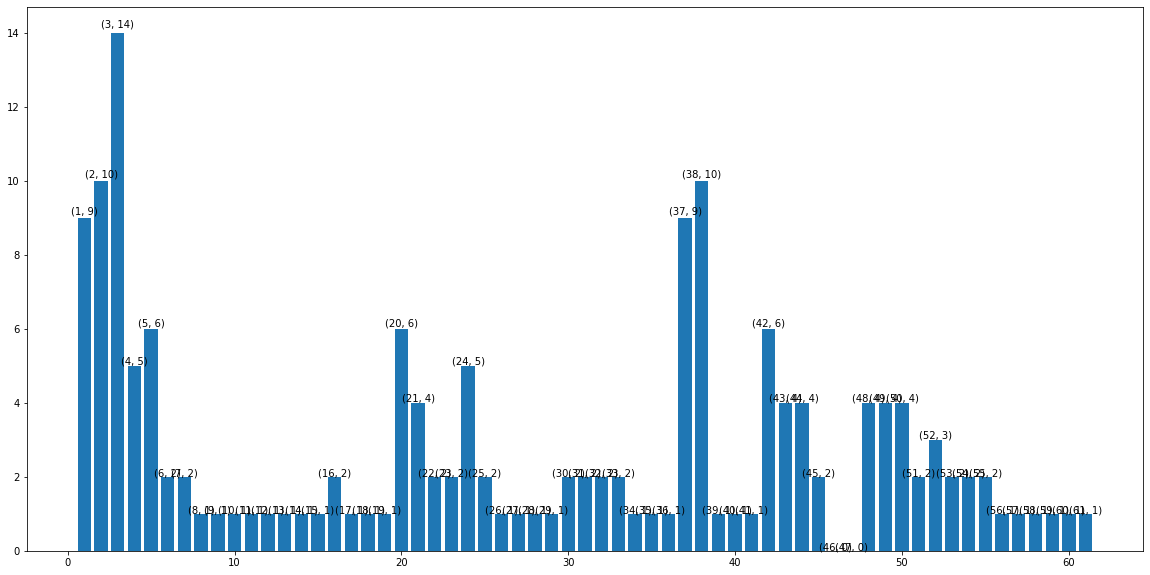

In [5]:
count_list=[]
for i in range(0,num_ref):
    count_list.append(count[i+1])
count_list

plt.figure(figsize=(20, 10))
ax = plt.bar(range(1,num_ref+1),count_list)
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds
    plt.annotate("(%i, %i)"%(left+0.4, height), (left+width/2, height*1.01), ha='center')
